## Configuration and import

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
!pip install pm4py
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/trello-logs/CSVs-completos.zip .
!cp /content/drive/MyDrive/trello-logs/bomi.py .
!unzip CSVs-completos.zip

     |████████████████████████████████| 1.8 MB 4.9 MB/s 
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23595 sha256=a6da73217471374517f51ab9356ddc4058b5e7b62e82880102bd97020090ab89
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built stringdist
Mounted at /content/drive
Archive:  CSVs-completos.zip
   creating: CSVs-completos/
  inflating: __MACOSX/._CSVs-completos  
  inflating: CSVs-completos/Merseyside Fire & Rescue Training and Education information trello.csv  
  inflating: __MACOSX/CSVs-completos/._Merseyside Fire & Rescue Training and Education information trello.csv  
  inflating: CSVs-completos/speleo.se.csv  
  inflating: __MACOSX/CSVs-completos/._speleo.se.csv  
  inflating: CSVs-completos/浙江任务.csv  
  inflating: __MACOSX/CSVs-completos/._浙江任务.csv  
  inflating: CSVs-completos/Iishee orooroi.csv  
  inflating: __MACOSX/CSVs-completos/._Iishee orooroi.csv  
  

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import bomi

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [ ]:
import os

all = []
for file in os.listdir("CSVs-completos"):
    df = pd.read_csv(f"CSVs-completos/{file}", index_col=0, parse_dates=["date"], low_memory=False)
    info = bomi.log_info(df)
    

    info['name'] = file
    all.append(info)

result = pd.DataFrame.from_records(pd.json_normalize(all))
result['board_duration'] = (result['ends'] - result['start'])
result.head(10)

,events,attribs,cards,lists,list_first_create,list_last_create,list_renamed,list_closed,start,ends,board_duration,first_event_type,members,card_members_assigned,card_checklists,card_movement,card_closed,card_deleted,card_due,cards_moving_perc,cards_checklist_perc,cards_assigned_perc,cards_closed_perc,name,events_per_member.count,events_per_member.mean,events_per_member.std,events_per_member.min,events_per_member.25%,events_per_member.50%,events_per_member.75%,events_per_member.max
0,115,28,36,4,2021-10-19 17:41:31.307,2021-10-28 15:08:28.810,0,1,2021-10-19 17:41:18.278,2022-01-11 14:47:02.093,83 days 21:05:43.815000,createBoard,1,0,0,7,20,7,0,0.166667,0.000000,0.000000,0.555556,Quevedo Motors.csv,1.0,115.000000,NaN,115.0,115.00,115.0,115.00,115.0
1,2408,87,764,44,2013-06-17 23:29:34.939,2013-10-22 15:39:43.340,7,18,2012-04-26 17:51:56.913,2014-09-18 16:15:03.964,874 days 22:23:07.051000,createBoard,48,52,10,163,143,0,0,0.191099,0.011780,0.047120,0.183246,Inbox.csv,48.0,50.166667,154.862785,1.0,1.75,5.5,22.25,988.0
2,61,49,14,4,NaT,NaT,2,1,2020-11-10 14:54:02.622,2020-11-10 16:42:46.200,0 days 01:48:43.578000,copyBoard,4,11,4,8,5,0,0,0.357143,0.214286,0.428571,0.357143,WDA-G2.csv,4.0,15.250000,17.289207,1.0,3.25,10.5,22.50,39.0
3,201,33,39,9,2012-06-17 19:29:57.917,2012-12-17 14:34:17.067,10,6,2012-06-10 10:35:04.673,2013-03-20 14:55:45.228,283 days 04:20:40.555000,createBoard,1,0,7,43,3,0,0,0.615385,0.153846,0.000000,0.076923,B71_Script.csv,1.0,201.000000,NaN,201.0,201.00,201.0,201.00,201.0
4,115,59,19,5,2021-06-17 11:06:45.490,2021-06-19 10:45:38.841,2,0,2021-06-17 11:05:26.878,2021-09-23 17:07:03.198,98 days 06:01:36.320000,createBoard,3,4,0,31,4,0,0,0.842105,0.000000,0.210526,0.210526,Muunship.csv,3.0,38.333333,40.253364,8.0,15.50,23.0,53.50,84.0
5,677,31,83,1,2021-04-19 12:28:11.933,2021-04-19 12:28:11.933,0,0,2021-04-19 12:27:50.213,2021-05-17 20:56:08.940,28 days 08:28:18.727000,createBoard,1,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,lesscandprocor.csv,1.0,677.000000,NaN,677.0,677.00,677.0,677.00,677.0
6,129,86,32,11,2021-07-10 08:44:03.063,2021-07-18 10:28:57.137,0,3,2021-07-10 08:43:51.613,2021-08-26 11:13:18.974,47 days 02:29:27.361000,createBoard,4,1,0,2,1,0,0,0.062500,0.000000,0.031250,0.031250,Obby for epic admin.csv,4.0,32.250000,54.792791,1.0,1.00,7.0,38.25,114.0
7,143,24,85,9,NaT,NaT,0,0,2021-09-16 20:22:37.441,2022-02-20 17:21:23.361,156 days 20:58:45.920000,copyBoard,1,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,riomilelen.csv,1.0,143.000000,NaN,143.0,143.00,143.0,143.00,143.0
8,86,57,24,5,2022-02-27 21:07:37.061,2022-03-01 21:47:01.239,1,0,2022-02-22 20:50:03.439,2022-03-02 00:22:05.624,7 days 03:32:02.185000,createBoard,2,12,6,17,0,0,1,0.375000,0.250000,0.333333,0.000000,Marketing.csv,2.0,43.000000,59.396970,1.0,22.00,43.0,64.00,85.0
9,338,34,132,10,2021-01-22 22:58:24.691,2021-10-02 07:13:51.049,7,4,2021-01-22 22:57:12.696,2021-12-12 12:51:10.747,323 days 13:53:58.051000,copyBoard,1,0,0,43,19,0,0,0.234848,0.000000,0.000000,0.143939,Recovery.csv,1.0,338.000000,NaN,338.0,338.00,338.0,338.00,338.0


# Individual analysis

In [ ]:
#Board reading
df = pd.read_csv(f"CSVs-completos/Wooting roadmap.csv", index_col=0, parse_dates=["date"], low_memory=False)
bomi.enrich_log(df)
begin_end_redesign = bomi.detect_redesign(df, pd.Timedelta('1D'), threshold_l_events=4)
filtered_result = bomi.list_evolution(df, filter_short_lists=pd.Timedelta('30m'))
cl = bomi.connected_lists(df, use='comb', threshold=0)
df.shape

(1048, 78)

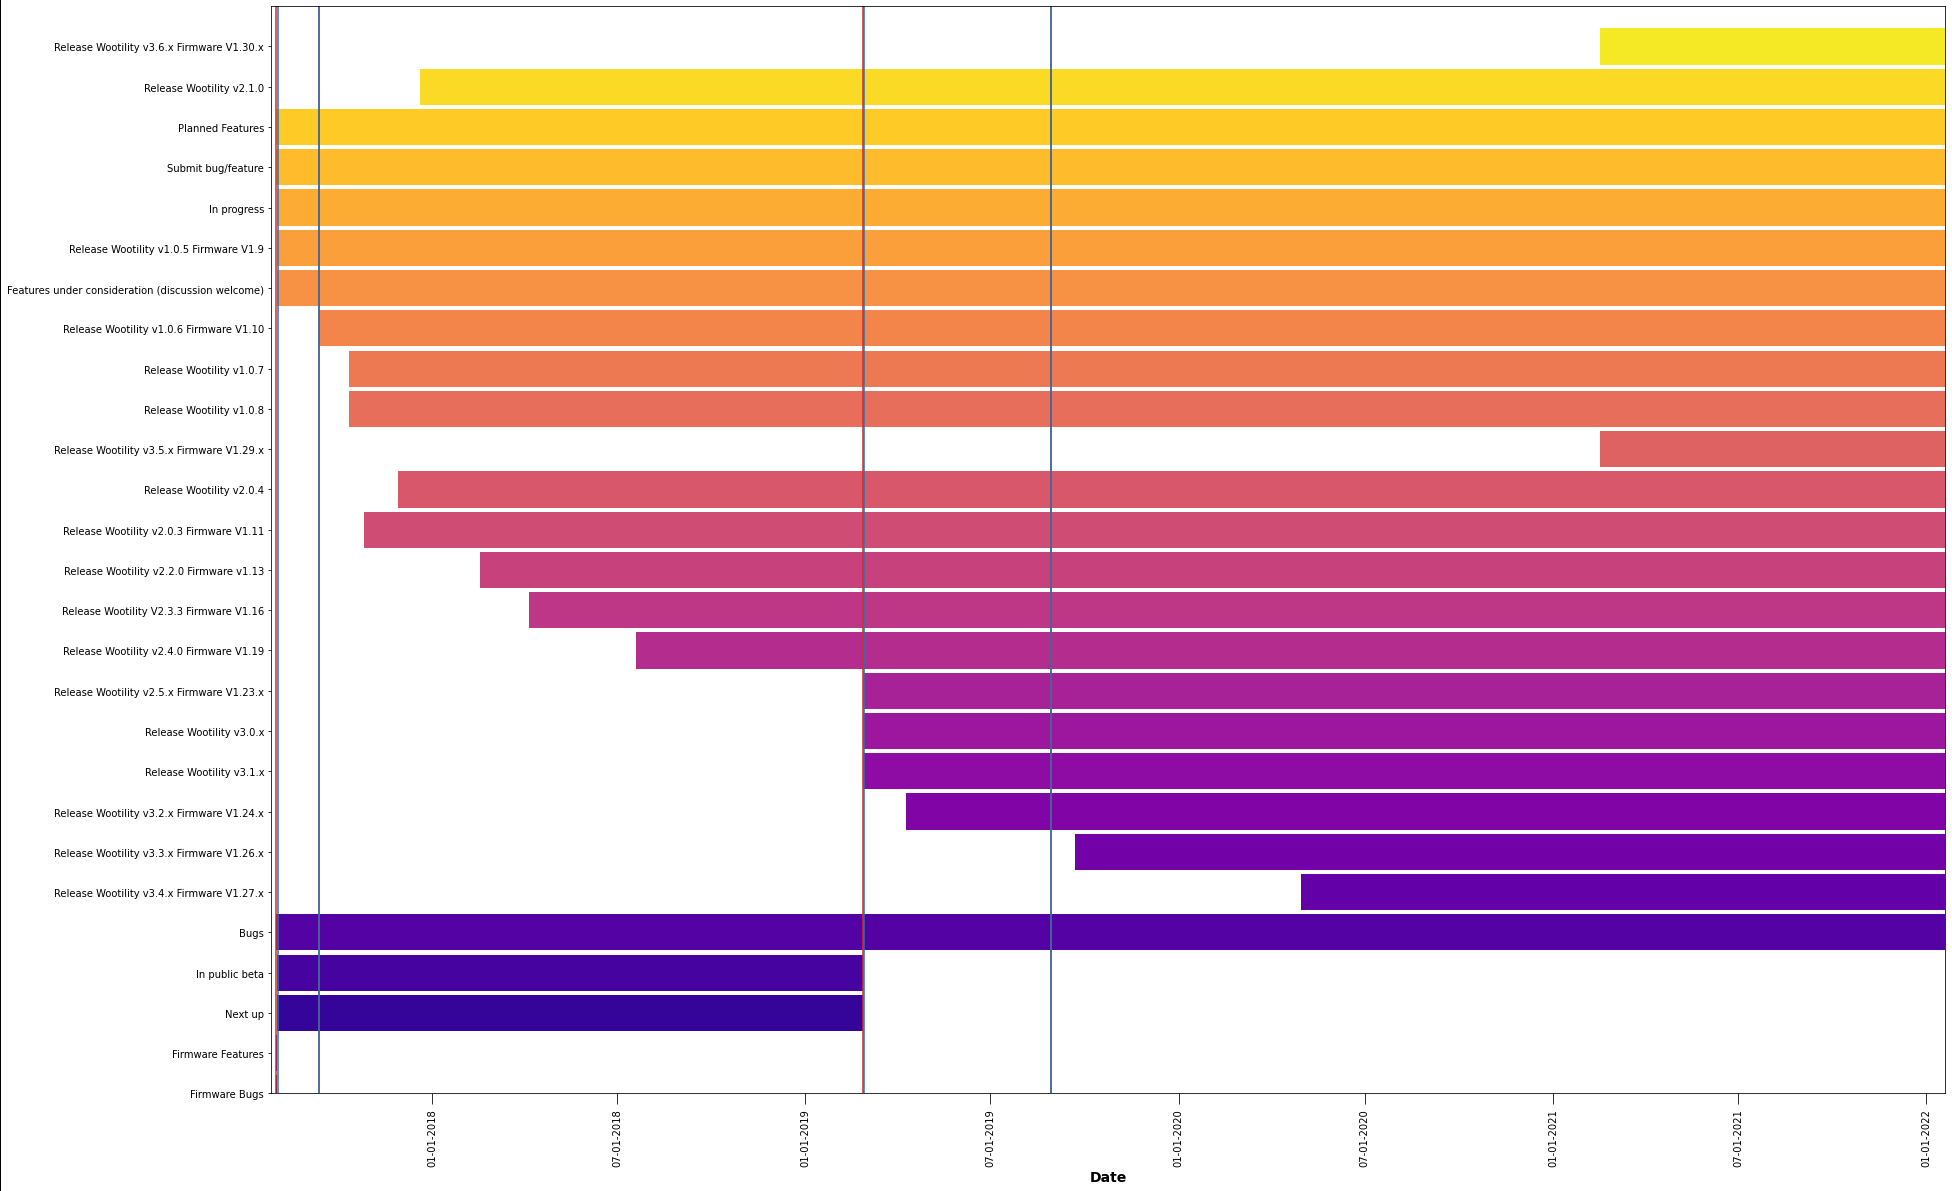

In [ ]:
#Evolution of the lists of the board over time (x-axis). Each row represents a list. The vertical lines represent the structural updates (red when it starts and blue when it finishes).

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30, 20), edgecolor="black", linewidth=1)
bomi.plot_list_diagram(filtered_result, begin_end_redesign, ax)
plt.show()


In [ ]:
#Board discovery: design (lists) and use (create and close cards, flow and semantic precedence)

bd = bomi.board_discovery(df, use='id', sp_threshold=0)
bd

{'card_close_list': data.list.id
 Bugs                                                 0.043478
 Planned Features                                     0.086957
 Submit bug/feature                                   0.043478
 Next up                                              0.043478
 In progress                                          0.043478
 Features under consideration (discussion welcome)    0.130435
 In public beta                                       0.043478
 Release Wootility v3.0.x                             0.086957
 Release Wootility v3.2.x Firmware V1.23.x            0.130435
 Release Wootility v3.3.x Firmware V1.26.x            0.260870
 Release Wootility v3.5.x Firmware V1.29.x            0.043478
 Release Wootility v3.6.x Firmware V1.30.x            0.043478
 Name: id, dtype: float64, 'card_create_list': data.list.id
 Bugs                                                 0.26
 Firmware Bugs                                        0.01
 Planned Features                

In [ ]:
#Metrics

info = bomi.static_metrics(df, begin_end_redesign)
info

,events,cards,lists,list_num_components,list_connected_size_mean,list_connected_size_mean_perc,list_num_components_move,move_per_list_with_move,list_with_move_perc,cards_moving_perc,moves_per_moving_card,act_per_list,cards_act_perc,act_per_act_card,cards_closed_perc
"(2019-08-29 03:41:26.226000, 2022-01-19 13:31:34.322000]",131,35,10,4,2.50,0.250000,1,5.142857,0.700000,0.400000,1.285714,10.625000,0.600000,4.047619,0.228571
"(2019-02-27 04:04:43.729000, 2019-08-29 03:09:07.916000]",124,42,9,4,2.25,0.250000,1,4.666667,0.666667,0.238095,1.400000,9.375000,0.642857,2.777778,0.190476
"(2017-09-12 08:15:53.432000, 2019-02-26 07:13:23.839000]",272,53,17,4,4.25,0.250000,1,8.571429,0.823529,0.433962,2.608696,16.888889,0.735849,4.102564,0.000000
"(2017-08-03 07:46:28.502000, 2017-09-12 08:15:21.782000]",280,49,9,3,3.00,0.333333,1,20.000000,0.777778,0.571429,2.500000,22.750000,0.938776,4.000000,0.040816


In [ ]:
# Days between redesigns
days_redesigns = pd.concat([begin_end_redesign['max'], begin_end_redesign['min'].shift(1, fill_value=df['date'].max())], keys=['first', 'last'], axis=1)
days_redesigns

,first,last
4,2019-08-29 03:41:26.226000+00:00,2022-01-19 13:31:34.322000+00:00
6,2019-02-27 04:04:43.729000+00:00,2019-08-29 03:09:07.916000+00:00
14,2017-09-12 08:15:53.432000+00:00,2019-02-26 07:13:23.839000+00:00
15,2017-08-03 07:46:28.502000+00:00,2017-09-12 08:15:21.782000+00:00


In [ ]:
#Filtering an interval of he entire log

df_filter = df[(df["date"] > days_redesigns.iloc[2]['first']) & (df["date"] < days_redesigns.iloc[1]["last"])]
df_filter.shape

(457, 78)

In [ ]:
#Board discovery (restricted at the interval)

bomi.board_discovery(df_filter, use='id')

{'lists': ['Planned Features',
  'Release Wootility v3.6.x Firmware V1.30.x',
  'In progress',
  'Release Wootility v3.2.x Firmware V1.23.x',
  'Release Wootility v3.1.x',
  'Bugs',
  'Features under consideration (discussion welcome)',
  'Release Wootility v3.3.x Firmware V1.26.x',
  'Release Wootility v3.5.x Firmware V1.29.x',
  'Submit bug/feature',
  'Release Wootility v3.4.x Firmware V1.27.x',
  None,
  'Problem (Research Required)',
  None,
  'Release Wootility v1.0.6 Firmware V1.10'],
 'card_flow': [{'Bugs',
   'Features under consideration (discussion welcome)',
   'In progress',
   'Planned Features',
   'Release Wootility v3.1.x',
   'Release Wootility v3.2.x Firmware V1.23.x',
   'Release Wootility v3.3.x Firmware V1.26.x',
   'Release Wootility v3.5.x Firmware V1.29.x',
   'Release Wootility v3.6.x Firmware V1.30.x'},
  {'Submit bug/feature'},
  {'Release Wootility v3.4.x Firmware V1.27.x'},
  {None},
  {'Problem (Research Required)'},
  {None},
  {'Release Wootility v1.0.6